<a href="https://colab.research.google.com/github/matiasmimc/Tarea-Num-rica/blob/main/TareaNum%C3%A9rica_Mat%C3%ADasMiranda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Datos alumno#

Matías Miranda Cabrera
21.180.180-8
Sección 6



---


# Parte 0: Preámbulos de programación

---



Librerías a utilizar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importar función del solver
from scipy.integrate import solve_ivp

Definir constantes

In [ ]:
#Constantes
a_s = 10**(-2)
a_h = 7*10**(-2)
b1 = 3*10**(-2)
b2 = 3*10**(-2)
s = 5*10**(-4)
p = 5*10**(-3)
r = 10**(-2)
L = 10**2

#Condiciones iniciales
x_c0 = 10**2
y0 = L
a0 = 0

#empaquetar
args = [a_s, a_h, b1, b2, s, p, r, L]
X0 = [x_c0, y0, a0]

Definición de funciónes a utilizar

In [ ]:
def ac(args,k,x_c,x_e):
  p = args[5]
  a_c = p*(x_c+k*x_e)
  return a_c
assert ac(args,3,1,0) == 0.005

def cc(args,k,x_c,x_e,a):
  s = args[4]
  a_c = ac(args,k,x_c,x_e)
  m = min(1, a/a_c)
  return s*x_c*m

def ce(args,k,x_c,x_e,a):
  s = args[4]
  a_c = ac(args,k,x_c,x_e)
  m = min(1, a/a_c)
  return k*s*x_e*m

def a1(args,k,x_c,x_e,a):
  a_s = args[0]
  a_h = args[1]
  c_c = cc(args,k,x_c,x_e,a)
  m = max(0,(1 - c_c/(s*x_c)))
  return a_s + m*(a_h - a_s)

def a2(args,k,x_c,x_e,a):
  a_s = args[0]
  a_h = args[1]
  c_e = ce(args,k,x_c,x_e,a)
  m = max(0,(1 - c_e/(s*x_e)))
  return a_s + m*(a_h - a_s)

---

# Parte 1: Modelo simplificado a una EDO

---


Como para esta parte consideraremos $x_E, y, a$ como constantes, sus derivadas son 0 y sus ecuaciones asociadas dejan de ser EDO's, por lo que el sistema de EDO's queda de la forma:

$$x_C = b_1 \cdot x_C - a_1 \cdot x_C$$

con $x_C(0) = 10^{2}$

### Programar función de lado derecho.

Usaremos $D = 1$ y $k = 1$.


In [ ]:
D = 1
k = 1
def F(t,X,args):
  #desempaquetar
  a_s, a_h, b1, b2, s, p, r, L = args
  x = X
  #variables
  a_1 = a1(args,k,x,0,250)
  #derivadas
  dx = b1*x - a_1*x

  return np.array([dx])

## Método de Euler progresivo


In [ ]:
def euler_progresivo(F,ti,tf,x0,h,args):
  #cantidad de pasos
  N = int((tf-ti)/h)
  #arreglo de tiempo
  I = np.linspace(ti,tf,N)
  #array que guarda soluciones
  X = np.zeros(N)
  #condicion inicial
  X[0] = x0

  #metodo
  for i in range(N-1):
    X[i+1] = X[i] + h*F(I[i], X[i], args)

  return (I,X)

In [ ]:
#guardar solución
I1, X1 = euler_progresivo(F,0,1000,x_c0,1,args)

## Método de Heun

Como $N = \frac{t_f - t_i}{h}$, con $t_i = 0$,$\ \ $ $t_f = 1000$ $\ $y$\ $ $h=1$, tenemos que $N = \frac{1000-0}{1} = 1000$, que usaremos para los siguientes métodos de Heun y Runge Kutta 4

In [ ]:
def heun(F,ti,tf,N,x0,args):
  #arreglo de tiempo
  I = np.linspace(ti,tf,N)
  #paso
  h = I[1] - I[0]
  #array que guarda soluciones
  X = np.zeros(N)
  #condición inicial
  X[0] = x0

  #método
  for i in range(N-1):
    x_tilda = X[i] + h*F(I[i], X[i], args)
    X[i+1] = X[i] + (h/2)*(F(I[i], X[i], args)+F(I[i+1], x_tilda, args))

  return (I,X)

In [ ]:
#guardar solución
I2, X2 = heun(F,0,1000,1000,x_c0,args)

## Método de Runge Kutta 4

In [ ]:
def runge_kutta4(F,ti,tf,N,x0,args):
  #arreglo de tiemo
  I = np.linspace(ti,tf,N)
  #paso
  h = I[1] - I[0]
  #array con soluciones
  X = np.zeros(N)
  #condición inicial
  X[0] = x0

  #método
  for i in range(N-1):
    g1 = F(I[i], X[i], args)
    g2 = F(I[i] + h/2, X[i] + h/2*g1, args)
    g3 = F(I[i] + h/2, X[i] + h/2*g2, args)
    g4 = F(I[i] + h, X[i] + h*g3, args)
    X[i+1] = X[i] + h/6*(g1+2*g2+2*g3+g4)

  return (I,X)

In [ ]:
#guardar solución
I3, X3 = runge_kutta4(F,0,1000,1000,x_c0,args)

## Gráfico de la solución con cada método

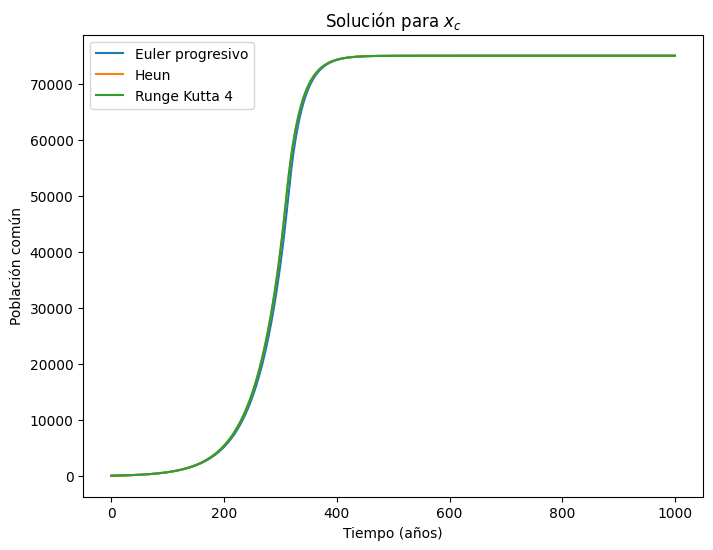

In [ ]:
# graficar la solución

#tamaño
plt.figure(figsize=(8,6))
#curvas
plt.plot(I1,X1, label="Euler progresivo")
plt.plot(I2,X2, label="Heun")
plt.plot(I3,X3, label="Runge Kutta 4")
# nombres de los ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población común")
plt.title("Solución para $x_c$")
plt.legend()
plt.show()

Cálculo de los métodos con paso $2^{-1}$

> considerando que $N = \frac{1000-0}{2^{-1}} = 2000$


In [ ]:
#guardar soluciones
I12, X12 = euler_progresivo(F,0,1000,x_c0,2**-1,args)
I22, X22 = heun(F,0,1000,2000,x_c0,args)
I32, X32 = runge_kutta4(F,0,1000,2000,x_c0,args)

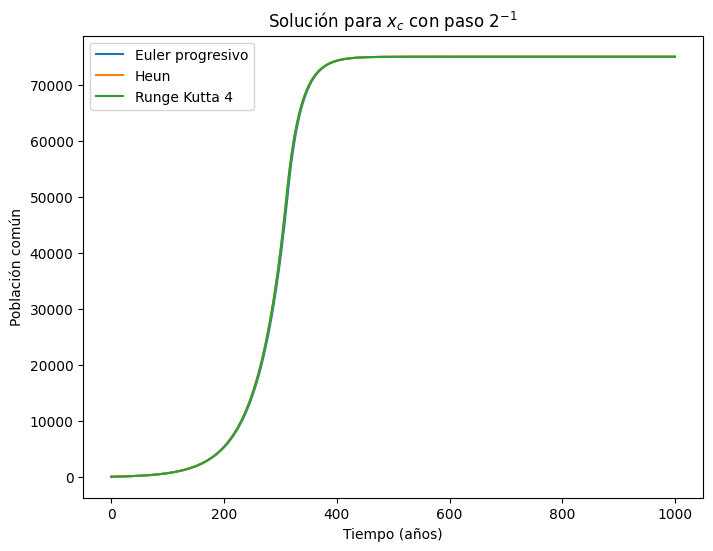

In [ ]:
#     gráfico

#tamaño
plt.figure(figsize=(8,6))
#curvas
plt.plot(I12,X12, label="Euler progresivo")
plt.plot(I22,X22, label="Heun")
plt.plot(I32,X32, label="Runge Kutta 4")
# nombres de los ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población común")
plt.title("Solución para $x_c$ con paso $2^{-1}$")
plt.legend()
plt.show()

Cálculo de los métodos con paso $2^{-2}$

> considerando que $N = \frac{1000-0}{2^{-2}} = 4000$

In [ ]:
#guardar soluciones
I13, X13 = euler_progresivo(F,0,1000,x_c0,2**-2,args)
I23, X23 = heun(F,0,1000,4000,x_c0,args)
I33, X33 = runge_kutta4(F,0,1000,4000,x_c0,args)

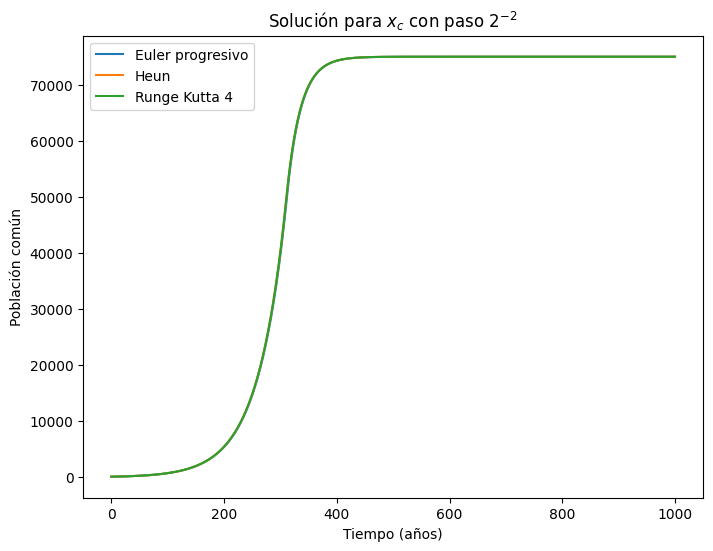

In [ ]:
#     grafico

#tamano
plt.figure(figsize=(8,6))
#curvas
plt.plot(I13,X13, label="Euler progresivo")
plt.plot(I23,X23, label="Heun")
plt.plot(I33,X33, label="Runge Kutta 4")
# nombres de los ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Población común")
plt.title("Solución para $x_c$ con paso $2^{-2}$")
plt.legend()
plt.show()

### Cálculo del error de lós métodos



Método de referencia: Runge kutta 4 con paso temporal de $2^{-8}$

> considerando que $N = \frac{1000-0}{2^{-8}} = 256000$


In [ ]:
Iref, Xref = runge_kutta4(F,0,1000,256000,x_c0,args)

In [ ]:
# recorrer vector x2 de N componentes cada k componentes:
#   x2[range(0,N-1,k)]

#error euler progresivo paso 1
e_e1 = np.linalg.norm(Xref[range(0,255999,256)]-X1)
#error heun paso 1
e_h1 = np.linalg.norm(Xref[range(0,255999,256)]-X2)
#error rk4 paso 1
e_r1 = np.linalg.norm(Xref[range(0,255999,256)]-X3)

#error euler progresivo paso 2^(-1)
e_e2 = np.linalg.norm(Xref[range(0,255999,128)]-X12)
#error heun paso 2^(-1)
e_h2 = np.linalg.norm(Xref[range(0,255999,128)]-X22)
#error rk4 paso 2^(-1)
e_r2 = np.linalg.norm(Xref[range(0,255999,128)]-X32)

#error euler progresivo paso 2^(-2)
e_e3 = np.linalg.norm(Xref[range(0,255999,64)]-X13)
#error heun paso 2^(-2)
e_h3 = np.linalg.norm(Xref[range(0,255999,64)]-X23)
#error rk4 paso 2^(-2)
e_r3 = np.linalg.norm(Xref[range(0,255999,64)]-X33)

In [ ]:
errores = pd.DataFrame()
# Valor respectivo de x
errores["Paso"] = [1, 2**-1, 2**-2]
# Valor de la solución analítica
errores["Euler progresivo"] = [e_e1, e_e2, e_e3]
# Error de Euler progresivo
errores["Heun"] = [e_h1, e_h2, e_h3]
# Error de Euler retrógrado
errores["Runge Kutta 4"] = [e_r1, e_r2, e_r3]
# Error de Euler modificado
errores

,Paso,Euler progresivo,Heun,Runge Kutta 4
0,1.00,17509.573858,1684.986589,1829.887710
1,0.50,12411.372015,1238.938729,1286.419307
2,0.25,8788.444431,884.969944,903.047365


In [ ]:
#   observación
#la desviación estandar entre los errores de los métodos baja según se usa
#un paso más pequeño
print(np.std([e_e1, e_h1, e_r1]))
print(np.std([e_e2, e_h2, e_r2]))
print(np.std([e_e3, e_h3, e_r3]))

7425.864081994888
5255.580026106289
3721.4800319100177




---


# Parte 2: Sociedad sin élites

---



como $x_e = 0$, nos queda el siguiente sistema de 3 ecuaciones y 3 incógnitas:

$${x_c}' = b_1 x_c -a_1 x_c$$
$$y' = ry(L-y) - Dx_cy$$
$$a' = Dx_cy-C_c$$

con $x_c(0) = 10^2\ $, $\ y(0) = L\ $, $\ a(0)= 0$.

## a) Programar función del lado derecho

In [ ]:
def F2(t,X,args):
  #desempaquetar
  xc, y, a = X[0], X[1], X[2]
  a_s, a_h, b1, b2, s, p, r, L = args
  #variables
  a_1 = a1(args,k,xc,0,a)
  Cc = cc(args,k,xc,0,a)
  #derivadas
  dxc = b1*xc - a_1*xc
  dy = (r*y*(L-y))-D1*xc*y
  da = D1*xc*y-Cc

  return np.array([dxc, dy, da])

## b) Definición del límite de carga óptimo

Dada la ecuación para el límite de carga para la naturaleza (X):
$$\chi = \frac{r}{D} \left(L-e\frac{s}{D}\right) = \frac{rL}{D}-\frac{res}{D^2}$$
La variación de $X$ con respecto a D es:
$$\frac{d\chi}{dD} = -\frac{rL}{D^2}+\frac{2res}{D^3}$$

Luego, $\hat{D}$ es punto crítico $\iff$ $\frac{d\chi (\hat{D})}{dD} = 0$

$$\iff \frac{2res}{\hat{D}} = rL$$

$$\iff \hat{D} = \frac{2e\cdot s}{L}$$

Luego,
$$\frac{d^2\chi(D)}{dD^2} = \frac{2rl}{D^3}-\frac{6res}{D^4}$$

$$\implies \frac{d^2\chi(\hat{D})}{dD^2} = -\frac{rL^4}{8e^3s^3}$$

Y como $r,L,e,s >0$, y por criterio de la segunda derivada, $\hat{D}$ es máximo de la función, es decir, $\chi(\hat{D})$ es el máximo límite de carga de  la naturaleza.

Además la carga límite óptima:
$$\left(\chi(\hat{D}\right) = \frac{rL^2}{2es}-\frac{rL^2}{4es} = \frac{rL^2}{4es}$$

Y como $\frac{1}{\hat{D}} = \frac{L}{2es}$:

$$\left(\chi(\hat{D}\right) = \chi_M = \frac{rL}{2\hat{D}}$$

### Método de Heun

In [ ]:
a_s, a_h, b1, b2, s, p, r, L = args
e = (a_h-b1)/(a_h-a_s)
D1 = (2*e*s)/L
#(D1 para no confundirlo con el D de la parte 3)
k = 1

# lo defino denuevo para devolver una array (X) de dimesnión distinta
def heun2(F,ti,tf,N,X_0,args):
  I = np.linspace(ti,tf,N)
  h = I[1] - I[0]
  X = np.zeros((N,3))
  X[0] = X_0

  for i in range(N-1):
    x_tilda = X[i] + h*F(I[i], X[i], args)
    X[i+1] = X[i] + (h/2)*(F(I[i], X[i], args)+F(I[i+1], x_tilda, args))

  return (I,X)

### Soluciónes

In [ ]:
I, X = heun2(F2,0,1000,1000,np.array(X0),args)
xc, y, a = X[:,0], X[:,1], X[:,2]

definición de la función $\chi(\hat{D})$:

In [ ]:
#chi evaluado en D gorro
chi_D = (r*L)/(2*D1)
#arreglo con la misma dimensión que el arreglo de tiempo
chi_cte = np.array(len(I)*[chi_D])

### Gráfico de las soluciones

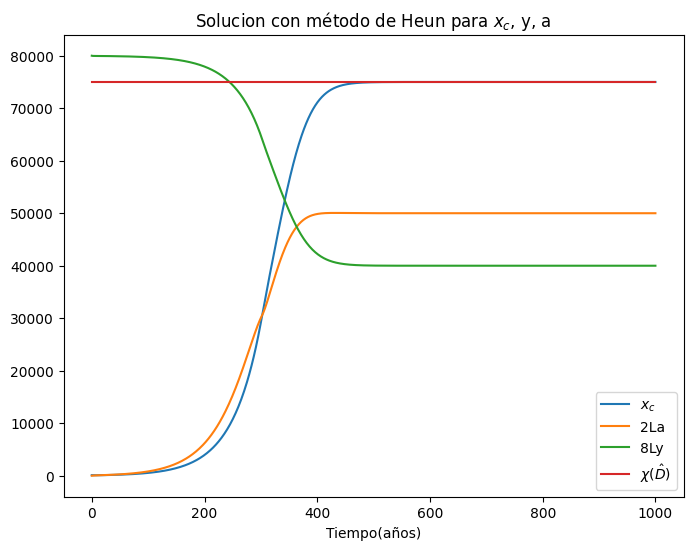

In [ ]:
#    gráfico

#tamaño
plt.figure(figsize=(8,6))
# curvas para x_c, y, a
plt.plot(I, xc, label="$x_c$")
#plt.plot(I, y, label="y")
#plt.plot(I, a, label="a")
plt.plot(I, 2*L*a, label="2La")
plt.plot(I, 8*L*y, label="8Ly")
plt.plot(I, chi_cte, label="$\chi(\hat{D})$")
#labels
plt.xlabel("Tiempo(años)")
plt.title("Solucion con método de Heun para $x_c$, y, a")
plt.legend()
plt.show()

####Comportamiento de las soluciones

Podemos verificar en el gráfico, que la variación positiva de $\textbf{a}$(alimento) y la variación negativa de $\textbf{y}$ (recursos naturales) son dependientes a su relación con la función $x_c$, como podíamos apreciar en el sistema de ecuaciones, pero la variación es pequeña ya que es atenuada por el término de D usado del orden de $10^{-6}$. Es por esto que los valores de las funciones $\textbf{a}$ e $\textbf{y}$ son mucho menores al valor de $x_c$, reflejado en que al amplificar la función $\textbf{y}$ por $8L = 800$, esta se acerca al orden de $x_c$ para $t >\ \sim 300$ años.

Luego de esta variación de los gráficos para $\textbf{$x_C$, a, y}$, se estabilizan para $t \approxeq 400$ años, además, la solución de $x_C(t)$ tiende a la carga límite óptima $\chi_M$ que es su asíntota en el intervalo de estudio, es decir, la población de gente común de la sociedad se acerca al valor del límite de carga.

Dado que L es el límite de carga de la naturaleza, para aumentarlo, se debería aumentar el esapacio y la infraestructura ocupada por la población.

####Valor de $k$

La variación del valor de $k$ no altera las soluciones obtenidas en este paso, dado que las variables dependientes de $k$ son:
 $$a_c = p\cdot (x_c + k\cdot x_E)$$
y
$$C_E = s\cdot k\cdot x_E \cdot min \bigg\{1,\frac{a}{a_c}\bigg\}$$

Luego, como definimos $x_E = 0$,
$$a_c = p\cdot x_c \hspace{1cm} \wedge \hspace{1cm} C_E = 0 $$

que no dependen de $k$.

## c) Solución con Solver
Usando $D = 5.5 \hat{D}$

In [ ]:
#redefinir D1 para usarlo en la función del lado derecho
D1 = 5.5*D1

### Con rtol = $10^{-3}$

In [ ]:
#generar la solución con el solver
sol = solve_ivp(F2, (0,1000), X0, rtol=10**(-3), args = (args,))

Obtener tiempo y soluciones

In [ ]:
#obtener las variables del diccionario generado por el solver
I, Xa = sol["t"], sol["y"]
xc, y, a = Xa[0], Xa[1], Xa[2]

#len(I) = 241

Gráfico de la solución

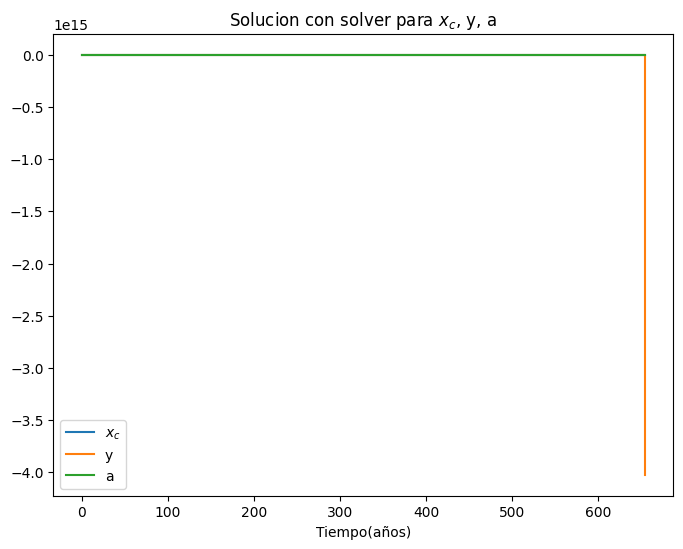

In [ ]:
#   gráfico

#tamaño
plt.figure(figsize=(8,6))
#curvas para x_c, y, a
plt.plot(I, xc, label="$x_c$")
plt.plot(I, L*y, label="y")
plt.plot(I, L*a, label="a")
#labels
plt.xlabel("Tiempo(años)")
plt.title("Solucion con solver para $x_c$, y, a")
plt.legend()
plt.show()

### Con rtol = $10^{-12}$

In [ ]:
#generar la solución con el solver
sol = solve_ivp(F2, (0,1000), X0, rtol=10**(-12), args = (args,))

In [ ]:
# obtener las variables del diccionario generado por el solver
I, Xb = sol["t"], sol["y"]
xc, y, a = Xb[0], Xb[1], Xb[2]

#len(I) = 898

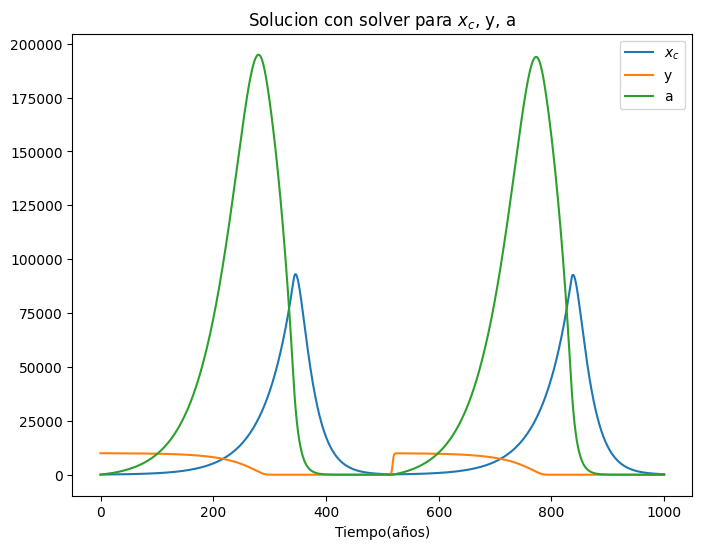

In [ ]:
#   gráfico

#tamaño
plt.figure(figsize=(8,6))
#curvas para x_c, y, a
plt.plot(I, xc, label="$x_c$")
plt.plot(I, L*y, label="y")
plt.plot(I, L*a, label="a")

#labels
plt.xlabel("Tiempo(años)")
plt.title("Solucion con solver para $x_c$, y, a")
plt.legend()
plt.show()

#### Describir que ocurre

Para el caso de rtol $10^{-12}$, el solver usó más pasos dentro del intervalo de la solución
$$N(10^{-3}) = 241 \hspace{1cm} \wedge \hspace{1cm} N(10^
{-12}) = 898 $$

Esto indica que el error de la solución para valores menores de rtol debería ser de menor orden.

Además, para valores de rtol menores o iguales a $10^{-3.5}$ la solución entregada por el solver no tiene sentido, dado que el método tiene una cota para el error muy grande. Luego, para valores de rtol mayores a $10^{-3.51}$, las funciones tienen una forma periódica y sus periodos disminuyen a medida que se disminuye rtol.

El aumento del valor de D para este paso resultó en una mayor variación de $\textbf{a(t)}$ y $\textbf{y(t)}$, donde la primera función incrementa y supera los valores de $x_C(t)$ al amplificar su gráfica por un valor menor que en la solución por método de Heun



---


#Parte 3: Sociedad igualitaria

---



Para esta parte se considera $x_E \neq 0\ $ y $\ C_c = C_E$. Por lo que nos queda el siguiente sistema:

$${x_c}' = b_1 x_c - a_1 x_c$$
$${x_E}' = b_2 x_E - a_2 x_E$$
$$y' = ry(L-y) - Dx_cy$$
$$a' = Dx_cy-2C_c$$

con $x_c(0) = 10^2\ $, $\ y(0) = L\ $, $\ a(0)= 0\ $, $\ x_e(0) = 25$.

## a) Programar función del lado derecho

In [ ]:
def F3(t,X,args):
  #desempaquetar
  xc, xe, y, a = X[0], X[1], X[2], X[3]
  a_s, a_h, b1, b2, s, p, r, L = args
  #variables
  a_1 = a1(args,k,xc,xe,a)
  a_2 = a2(args,k,xc,xe,a)
  Cc = cc(args,k,xc,xe,a)
  #derivadas
  dxc = b1*xc - a_1*xc
  dxe = b2*xe - a_2*xe
  dy = r*y*(L-y)-D2*xc*y
  da = D2*xc*y-(2*Cc)

  return np.array([dxc, dxe, dy, da])

## b) Definición del límite de carga óptimo

Dada la ecuación para el límite de carga ($\chi$):
$$\chi = \left(\frac{rL}{D}-\frac{res}{D^2}(1+\varphi)\right)(1+\varphi)$$

Tenemos que la variación de $\chi$ con respecto a D es:
$$\frac{d\chi}{dD} = \left(-\frac{rL}{D^2} + \frac{2res}{D^3}(1+\varphi)\right)(1+\varphi)$$

Luego, $\tilde{D}$ es punto crítico $\iff \frac{d\chi(\tilde{D})}{dD} = 0$

$$\iff \frac{2res}{\tilde{D}}(1+\varphi) = rL$$

$$\tilde{D} = \frac{2es}{L}(1+\varphi)$$

Luego,
$$\frac{d^2\chi(D)}{dD^2} = \left(\frac{2rL}{D^3}-\frac{6res}{D^4}(1+\varphi)\right)(1+\varphi)$$

$$\implies \frac{d^2\chi(\tilde{D})}{dD^2} = -\frac{rL^4}{8e^3s^3(1+\varphi)^2}$$

Y como $r,L,e,s, \varphi >0$, y por criterio de la segunda derivada, $\tilde{D}$ es máximo de la función, es decir, $\chi(\tilde{D})$ es el máximo límite de carga de  la naturaleza.

Además, la carga límite óptima:

$$\chi(\tilde{D}) = \left(\frac{rL^2}{2\ es(1+\varphi)}-\frac{rL^2}{4\ es(1+\varphi)}\right)(1+\varphi) = \frac{rL(1+\varphi)\cdot L}{2\cdot 2es(1+\varphi)}$$

Y como $\frac{1}{\tilde{D}} = \frac{L}{2es(1+\varphi)}$

$$\chi(\tilde{D}) = \chi_M = \frac{rL}{2\tilde{D}}(1+\varphi)$$


### Método de Heun

In [ ]:
a_s, a_h, b1, b2, s, p, r, L = args
#condición inicial para xe
x_e0 = 25
#nuevo array con condiciones iniciales
CI = np.array([x_c0, x_e0, y0, a0])
#definición de D para esta parte
e = (a_h-b1)/(a_h-a_s)
phi = x_e0/x_c0
D2 = (2*e*s*(1+phi))/L

k = 1

def heun3(F,ti,tf,N,X_0,args):
  #arreglo de tiempo
  I = np.linspace(ti,tf,N)
  #paso
  h = I[1] - I[0]
  #arreglo que guarda la solución en 4 columnas
  X = np.zeros((N,4))
  #condición inicial para las 4 edos
  X[0] = X_0

  #método
  for i in range(N-1):
    x_tilda = X[i] + h*F(I[i], X[i], args)
    X[i+1] = X[i] + (h/2)*(F(I[i], X[i], args)+F(I[i+1], x_tilda, args))

  return (I,X)

### Soluciones

In [ ]:
I, X = heun3(F3,0,1000,1000,CI,args)
#asignar las soluciones de las columnas a su respectiva variable
xc, xe, y, a = X[:,0], X[:,1], X[:,2], X[:,3]

definición de la función $\chi(\tilde{D})$:

In [ ]:
# chi evaluado en D tilde
chiD = r*L*(1+phi)/(2*D2)
# arreglo con la dimensión de I
chiCte = np.array(len(I)*[chiD])

### Gráfico de las soluciones

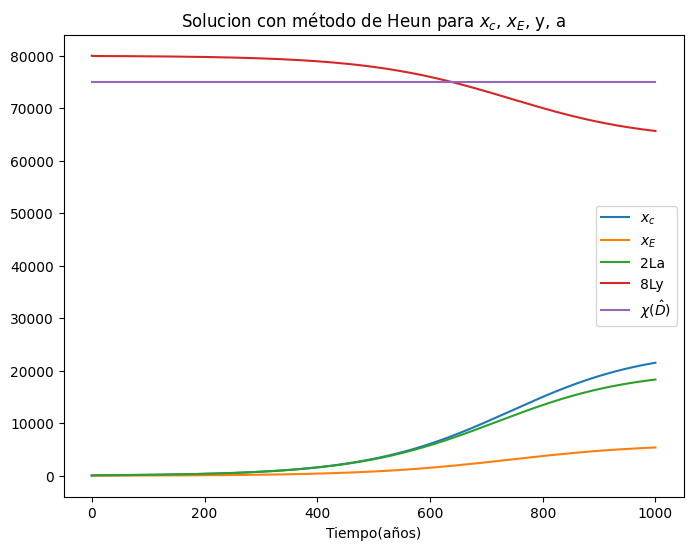

In [ ]:
#    gráfico

#tamaño
plt.figure(figsize=(8,6))
#curvas para x_c, x_E, y, a
plt.plot(I, xc, label="$x_c$")
plt.plot(I, xe, label="$x_E$")
#plt.plot(I, y, label="y")
#plt.plot(I, a, label="a")
plt.plot(I, 2*L*a, label="2La")
plt.plot(I, 8*L*y, label="8Ly")
plt.plot(I, chiCte, label="$\chi(\hat{D})$")
#labels
plt.xlabel("Tiempo(años)")
plt.title("Solucion con método de Heun para $x_c$, $x_E$, y, a")
plt.legend()
plt.show()

#### Comportamiento de las funciones

Para las soluciones por el método de Heun, la variación de las funciones es menor, pero no alcanzan a estabilizarse, es decir, tender a un valor en el intervalo estudiado.

En este caso el valor de la función $\textbf{$x_C(t)$}$ no se acerca al límite de carga óptimo, ya que su crecimiento es menor. Esto se debe a que en esta parte la derivada de $x_C$ depende de $-a_1$, que a su vez depende de $x_E$.

## c) Solución con solver

Usando $D = 5 \tilde{D}$

In [ ]:
D2 = 5*D2

### Con rtol $= 10^{-3}$

In [ ]:
sol = solve_ivp(F3, (0,1000), CI, rtol=10**(-3), args = (args,))

Obtener tiempo y soluciones

In [ ]:
# obtener las variables del diccionario generado por el solver
I, Xc = sol["t"], sol["y"]
xc, xe, y, a = Xc[0], Xc[1], Xc[2], Xc[3]

#len(I) = 236

Graficar las soluciones

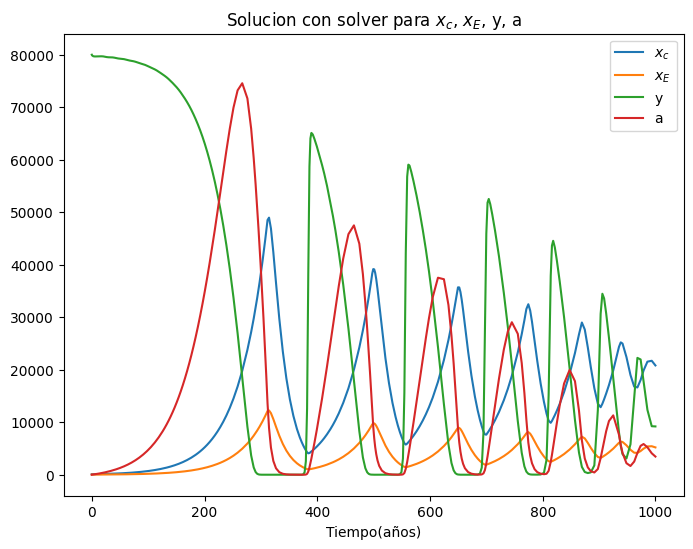

In [ ]:
#   gráfico

#tamaño
plt.figure(figsize=(8,6))
#curvas para x_c, x_e, y, a
plt.plot(I, xc, label="$x_c$")
plt.plot(I, xe, label="$x_E$")
plt.plot(I, 8*L*y, label="y")
plt.plot(I, 0.5*L*a, label="a")
#labels
plt.xlabel("Tiempo(años)")
plt.title("Solucion con solver para $x_c$, $x_E$, y, a")
plt.legend()
plt.show()

### Con rtol $=  10^{-12}$

In [ ]:
sol = solve_ivp(F3, (0,1000), CI, rtol=10**(-12), args = (args,))

Obtener tiempo y soluciones

In [ ]:
# obtener las variables del diccionario generado por el solver
I, Xd = sol["t"], sol["y"]
xc, xe, y, a = Xd[0], Xd[1], Xd[2], Xd[3]

#len(I) = 1371

Graficar las soluciones

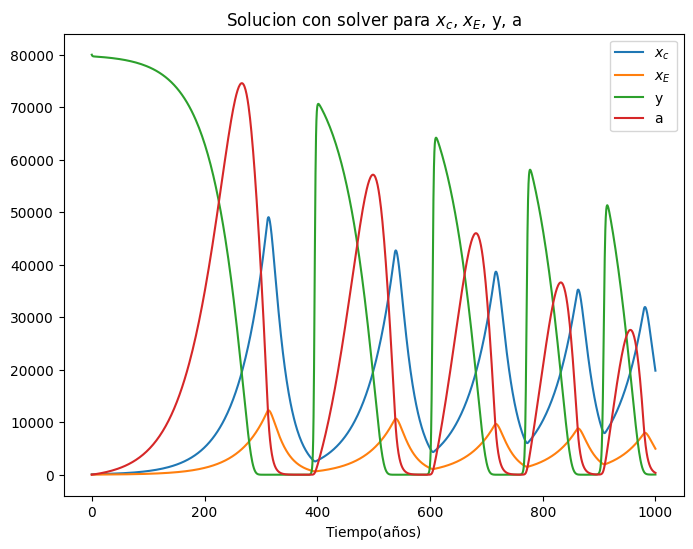

In [ ]:
#   gráfico

#tamaño
plt.figure(figsize=(8,6))
#curvas para x_c, x_e, y, a
plt.plot(I, xc, label="$x_c$")
plt.plot(I, xe, label="$x_E$")
plt.plot(I, 8*L*y, label="y")
plt.plot(I, 0.5*L*a, label="a")
#labels
plt.xlabel("Tiempo(años)")
plt.title("Solucion con solver para $x_c$, $x_E$, y, a")
plt.legend()
plt.show()

#### Comportamiento de las funciones

Al igual que en la parte 2 al resolver con el solver y disminuir los valores de rtol, el método utilizó más pasos en el intervalo de tiempo para obtener la solución.
$$N(10^{-3}) = 236 \hspace{1cm} \wedge \hspace{1cm} N(10^{-12}) = 1371 $$

En este gráfico se puede apreciar como se suavizan las curvas del gráfico a medida que se disminuye el valor de rtol.

Además, a medida que se disminuye el valor de rtol, aparecen más peaks de las funciones en el gráfico de la solución, lo que produce que las funciones tengan un mayor decrecimiento y los puntos de máximos locales presentes en el las curvas sean menores en valores de tiempo iguales.

---
# Parte 4: Sociedad desigual

---




Considerando $k>>1$

## a) soluciones para $D = 6.35 \cdot 10^{-6}$ y $k = 10$

Mediante el método de Heun

In [ ]:
D2 = 6.35*10**(-6)
k = 10

Obtener tiempo y soluciones

In [ ]:
#generar solución con el método definido en la parte anterior
I, X = heun3(F3, 0, 1000, 1000, CI, args)
xc, xe, y, a = X[:,0], X[:,1], X[:,2], X[:,3]

Graficar soluciones

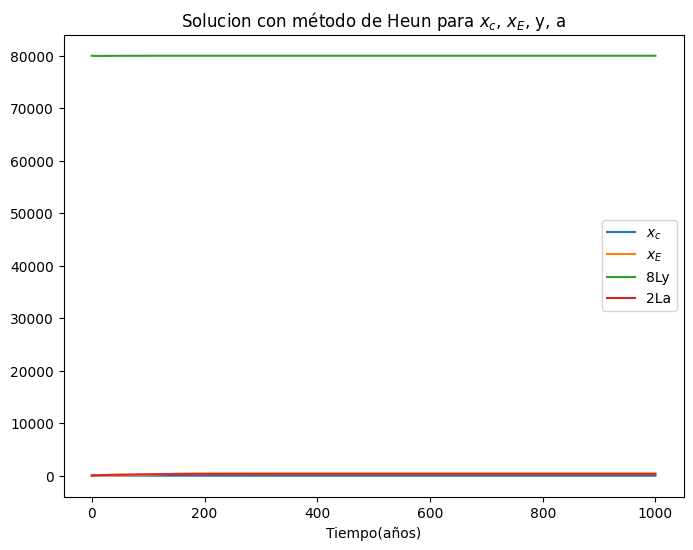

In [ ]:
#curvas para x_c, x_E, y, a
plt.figure(figsize=(8,6))
plt.plot(I, xc, label="$x_c$")
plt.plot(I, xe, label="$x_E$")
plt.plot(I, 8*L*y, label="8Ly")
plt.plot(I, 2*L*a, label="2La")
#labels
plt.xlabel("Tiempo(años)")
plt.title("Solucion con método de Heun para $x_c$, $x_E$, y, a")
plt.legend()
plt.show()

### Describir que ocurre

En este caso, $x_C$ colapsa, es decir que tiende a 0, lo que representa que la población de gente común (no de la élite) desaparece en el intervalo, es más, dado que su decrecimiento (su pendiente es -0.91 en el intervalo [0,100]), $x_C(t=165) < 1$.

Además, los valores de las funciones crecen (o decrecen) un en intervalo de tiempo corto (en relación al intervalo de tiempo considerado) y luego se estabilizan, como es el caso del crecimiento de $x_E$, dado que su derivada depende de $-a_2$, que a su vez depende de $x_C$

## b) soluciones para $D = 10^{-4}$

In [ ]:
D2 = 10**(-4)

Obtener soluciones

In [ ]:
#generar solución con el método de heun definido en la parte 3
I, X = heun3(F3, 0, 1000, 1000, CI, args)
xc, xe, y, a = X[:,0], X[:,1], X[:,2], X[:,3]

print(xe[999])

258900.8490414699


Graficar soluciones

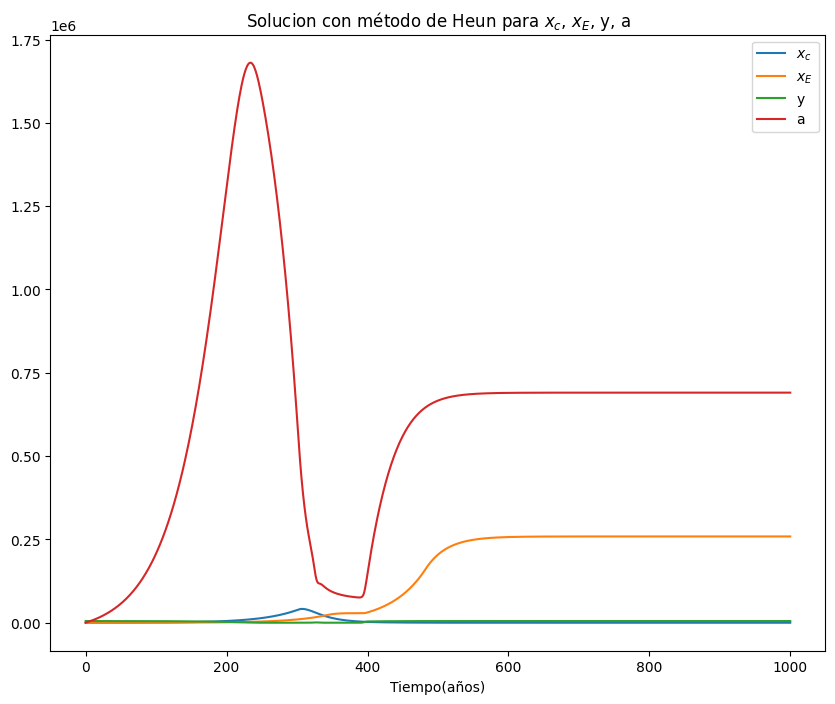

In [ ]:
#curvas para x_c, x_E, y, a
plt.figure(figsize=(10,8))
plt.plot(I, xc, label="$x_c$")
plt.plot(I, xe, label="$x_E$")
plt.plot(I, 0.5*L*y, label="y")
plt.plot(I, 8*L*a, label="a")
#labels
plt.xlabel("Tiempo(años)")
plt.title("Solucion con método de Heun para $x_c$, $x_E$, y, a")
plt.legend()
plt.show()

### Describir que ocurre

En este caso, al igual que en el anterior, $x_C$ colapsa, es decir, $x_C(t) \to 0$ cuando $t \to \infty$.

Por otra parte, el valor de $x_E(t)$ crece más que en el caso anterior, llegando a $\sim 259000$.

Estas variaciones influyen en la solución de $\textbf{a(t)}$, ya que esta crece abruptamente cuando $x_C$ crece, hasta un el instante en que $x_C$ llega a su máximo global y el valor de $y(t)$ decrece. Luego, cuando $x_C(t)$ tiende a 0, e $y(t)$ crece, los valores de $a(t)$ crecen y se estabilizan.